In [17]:
import yfinance as yf
import datetime as dt
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stocks = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS","INFY.NS","HINDUNILVR.NS", "ICICIBANK.NS", "HDFC.NS", "BHARTIARTL.NS","SBIN.NS", "BAJFINANCE.NS",
         "KOTAKBANK.NS", "WIPRO.NS", "DMART.NS", "HCLTECH.NS", "ASIANPAINT.NS", "BAJAJFINSV.NS", "ITC.NS", "LT.NS", "ULTRACEMCO.NS",
         "AXISBANK.NS", "MARUTI.NS", "TITAN.NS", "ADANITRANS.NS", "ONGC.NS", "SUNPHARMA.NS", "ADANIGREEN.NS", "TATAMOTORS.NS",
         "NESTLEIND.NS", "ADANIENT.NS", "JSWSTEEL.NS", "TATASTEEL.NS", "TECHM.NS", "ADANIPORTS.NS", "HDFCLIFE.NS", "NTPC.NS",
         "IOC.NS", "DIVISLAB.NS", "POWERGRID.NS", "GRASIM.NS", "PIDILITIND.NS", "LTI.NS", "VEDL.NS" , "SBILIFE.NS", "M&M.NS", 
         "BAJAJ-AUTO.NS", "DLF.NS", "DABUR.NS", "SHREECEM.NS", "COALINDIA.NS", "SBICARD.NS", "HINDALCO.NS", "GODREJCP.NS", "BPCL.NS",
         "ICICIPRULI.NS","BRITANNIA.NS", "SIEMENS.NS", "AMBUJACEM.NS", "HAVELLS.NS", "INDIGO.NS", "DRREDDY.NS", "INDUSINDBK.NS",
         "INDUSTOWER.NS", "NAUKRI.NS", "TATACONSUM.NS", "MOTHERSUMI.NS", "BERGEPAINT.NS", "EICHERMOT.NS", "ICICIGI.NS", "CIPLA.NS",
         "MARICO.NS", "MCDOWELL-N.NS", "GAIL.NS", "MUTHOOTFIN.NS", "PEL.NS", "APOLLOHOSP.NS", "UPL.NS", "HDFCAMC.NS", "BAJAJHLDNG.NS",
         "BOSCHLTD.NS", "HEROMOTOCO.NS", "CADILAHC.NS", "JUBLFOOD.NS", "BANDHANBNK.NS", "HINDPETRO.NS", "ACC.NS", "TORNTPHARM.NS",
         "PGHH.NS", "PNB.NS", "UBL.NS", "LUPIN.NS", "ABBOTINDIA.NS", "ALKEM.NS", "NMDC.NS", "COLPAL.NS", "BIOCON.NS", "AUROPHARMA.NS",
         "PETRONET.NS", "IGL.NS", "MRF.NS", "YESBANK.NS"]

In [19]:
asset = ["DABUR.NS", "ABBOTINDIA.NS", "BRITANNIA.NS", "COLPAL.NS", "HINDUNILVR.NS", "NESTLEIND.NS", "ALKEM.NS", "PGHH.NS", "HDFCLIFE.NS",
   "INFY.NS", "PIDILITIND.NS", "SBILIFE.NS", "BERGEPAINT.NS", "ITC.NS", "TCS.NS", "MARICO.NS" , "MARUTI.NS", "BAJAJ-AUTO.NS", "TORNTPHARM.NS",
        "HEROMOTOCO.NS", "BAJAJHLDNG.NS", "PETRONET.NS", "DIVISLAB.NS", "TATACONSUM.NS", "MCDOWELL-N.NS", "HDFCAMC.NS", "HDFCBANK.NS", "TITAN.NS", 
        "ULTRACEMCO.NS", "IOC.NS"]

In [20]:
close_price = pd.DataFrame()
for ticker in asset:
    close_price[ticker] = yf.download(ticker, start = "2020-09-01", end = "2021-08-31")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [21]:
Y = close_price[asset].pct_change().dropna()
display(Y.head())

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-02,0.003897,-0.000777,0.007478,0.009725,-0.009252,-0.012617,0.013329,0.010811,0.002676,0.010775,...,0.000925,-0.014555,0.030825,0.002461,0.011745,0.004509,0.006076,0.001116,0.007425,0.007679
2020-09-03,0.010623,0.003325,-0.013779,-0.007079,-0.001167,0.025087,0.011289,0.005991,0.002324,0.012500,...,-0.001037,-0.005201,-0.014471,0.052105,0.020491,0.018098,-0.002866,0.057077,0.001852,-0.002345
2020-09-04,-0.022034,0.005926,-0.010943,-0.014079,-0.006779,-0.009830,-0.024518,-0.008965,-0.012968,-0.017530,...,-0.021955,-0.016520,-0.018081,-0.016335,-0.020596,-0.022488,-0.010257,-0.021978,-0.008331,-0.014101
2020-09-07,0.008475,-0.003382,0.004911,0.005433,0.017862,0.010528,0.005276,0.001568,0.029931,0.006419,...,-0.040706,0.007442,-0.007462,-0.041736,-0.013902,0.002276,-0.007862,0.007289,-0.017224,-0.001192
2020-09-08,-0.003074,0.014376,0.002027,-0.004162,-0.009410,-0.016887,0.007855,-0.000362,-0.016896,0.015405,...,-0.011690,-0.006121,-0.027039,-0.012745,-0.017846,0.001197,0.001756,-0.004410,-0.006470,-0.012530


In [22]:
pip install path/cvxpy‑version.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: cvxpy‑version.whl is not a valid wheel filename.


In [23]:
# pip install --user riskfolio-lib 

In [24]:
pip install Riskfolio-Lib

Note: you may need to restart the kernel to use updated packages.


# Using MinRisk as an Objective with different Risk Measure

## Risk Measure: MAD

In [25]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MAD' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w1 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w1.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,0.012905,0.201711,0.032156,0.092005,1.293888e-12,0.060392,0.099853,0.12455,0.023109,0.047056,...,0.044874,3.906083e-13,0.038668,4.338186e-13,1.557300e-13,2.748097e-13,0.031811,3.476357e-13,3.568854e-13,0.009487


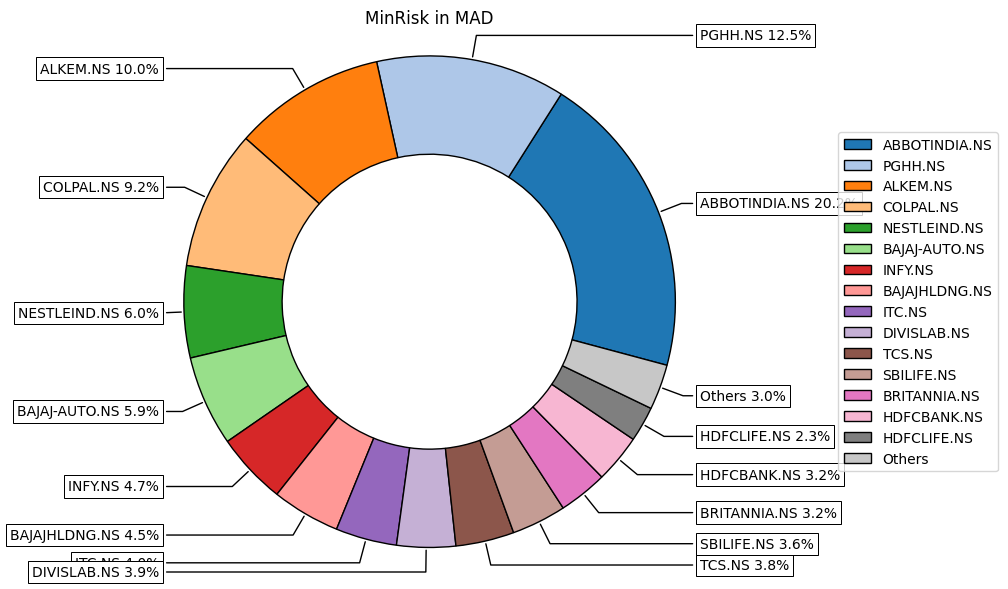

In [26]:
ax1 = rp.plot_pie(w=w1, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


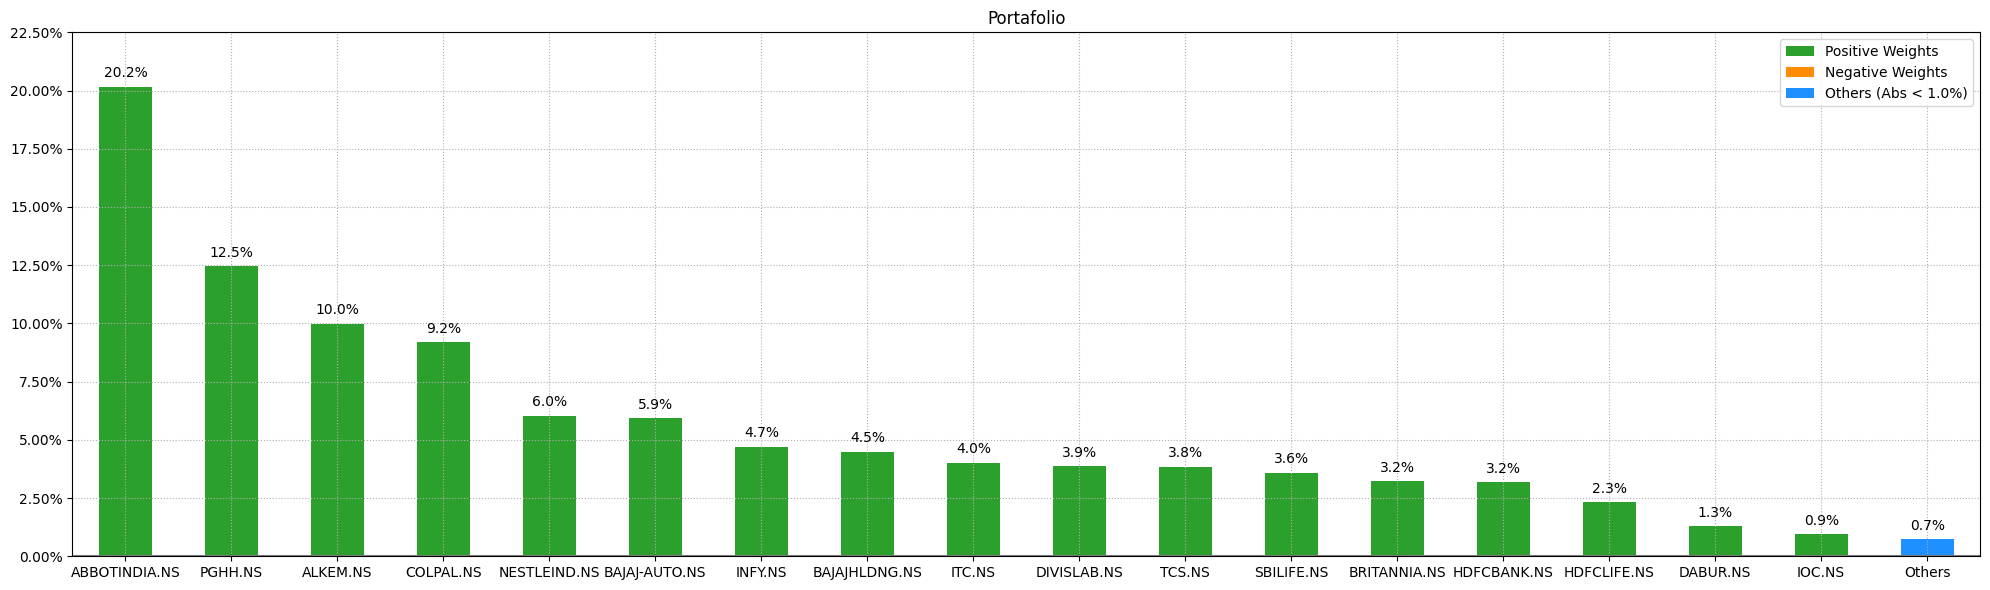

In [27]:
ax = rp.plot_bar(w1, title='Portafolio', kind="v", others=0.05,
                 nrow=25, height=6, width=20, ax=None)

# Risk Measure: EVaR

In [28]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EVaR' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w2 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w2.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,7.418679e-08,0.057276,0.063285,9.386137e-08,0.109753,0.056524,0.184459,0.336549,2.893215e-07,0.100089,...,0.039006,3.954471e-08,4.728774e-08,3.681578e-08,2.368865e-08,4.022668e-08,0.047276,2.403869e-08,3.906045e-08,1.949525e-08


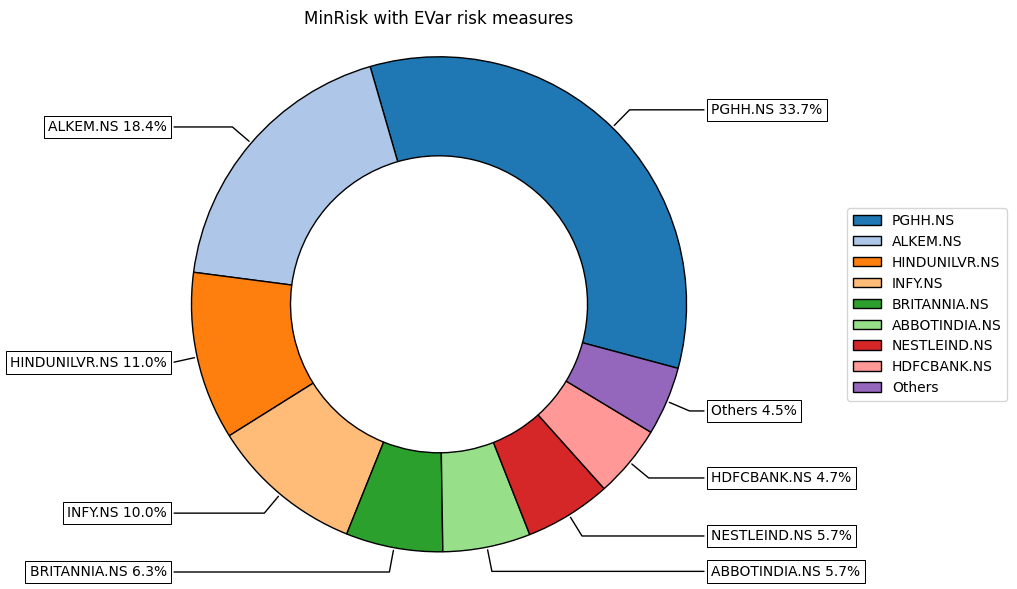

In [29]:
ax1 = rp.plot_pie(w=w2, title='MinRisk with EVar risk measures', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


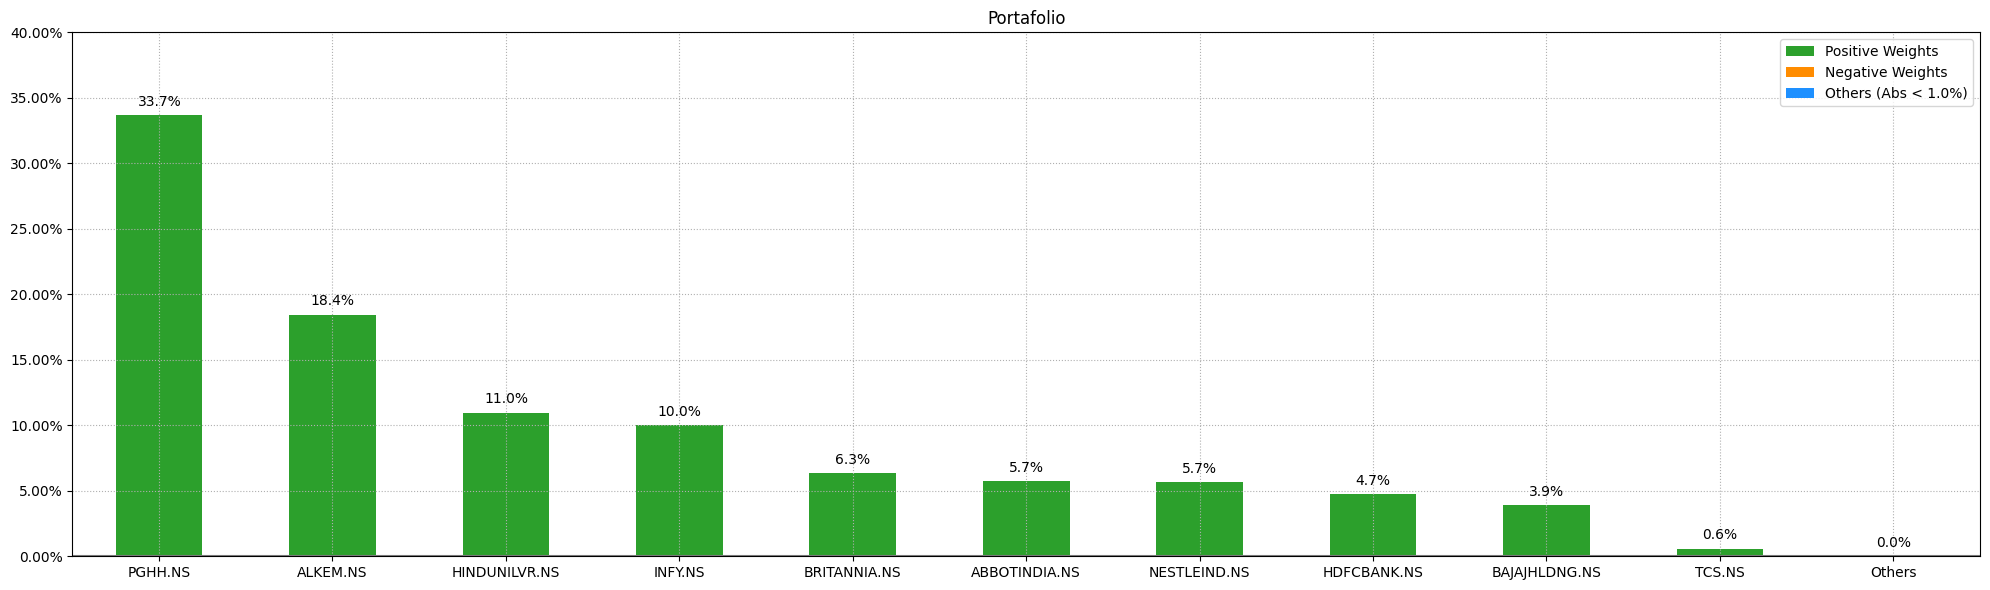

In [30]:
ax = rp.plot_bar(w2, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

# Risk Measure: CVaR

In [31]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CVaR' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w3 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w3.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,4.920057e-12,1.532976e-10,0.117473,0.000722,1.408020e-10,0.146746,0.185005,0.360013,5.777508e-12,0.0625,...,0.032264,4.430344e-12,4.484646e-12,2.711686e-12,2.318355e-12,3.674028e-12,0.056116,2.406536e-12,2.988730e-12,1.808690e-12


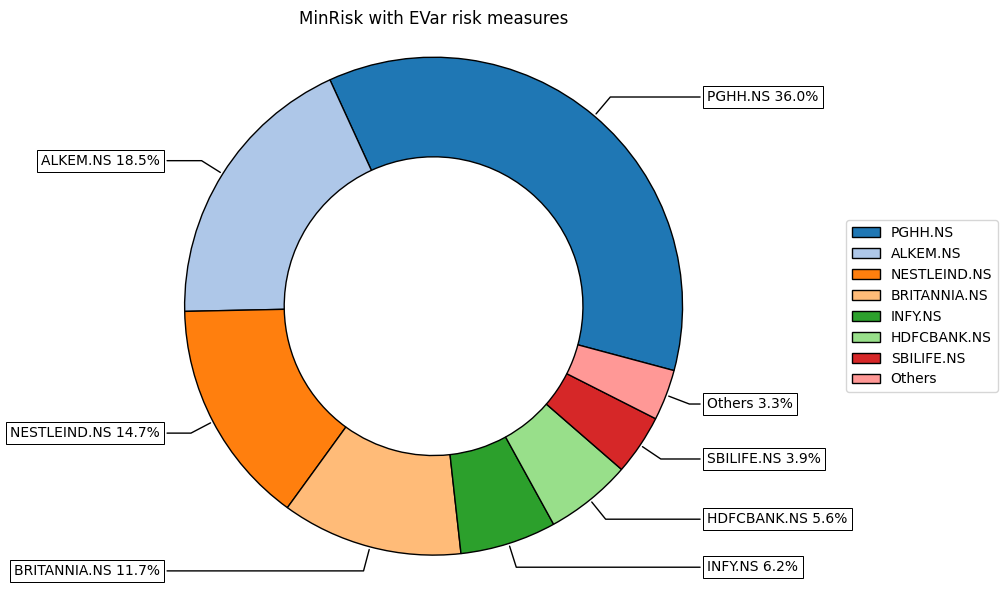

In [32]:
ax1 = rp.plot_pie(w=w3, title='MinRisk with EVar risk measures', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


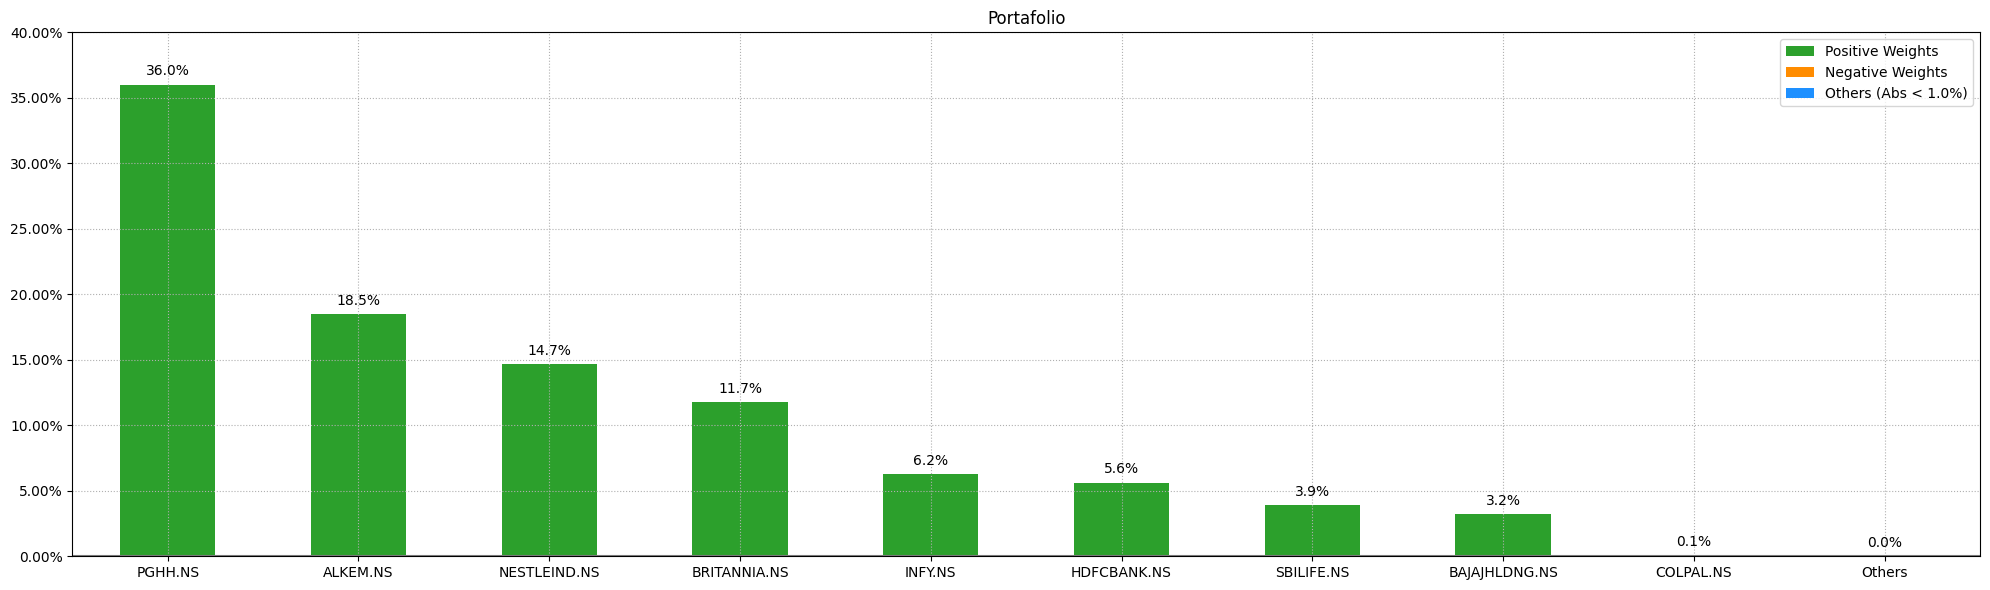

In [33]:
ax = rp.plot_bar(w3, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

# Risk Measure: CDaR

In [34]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CDaR' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w4 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w4.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,1.093187e-12,0.148211,1.811999e-10,1.395940e-12,0.078486,1.152829e-13,0.009389,0.287929,0.01628,0.120119,...,0.169747,5.722725e-14,5.998170e-14,1.342484e-13,2.000530e-14,3.329205e-14,1.129154e-13,1.469175e-13,0.058713,2.565853e-13


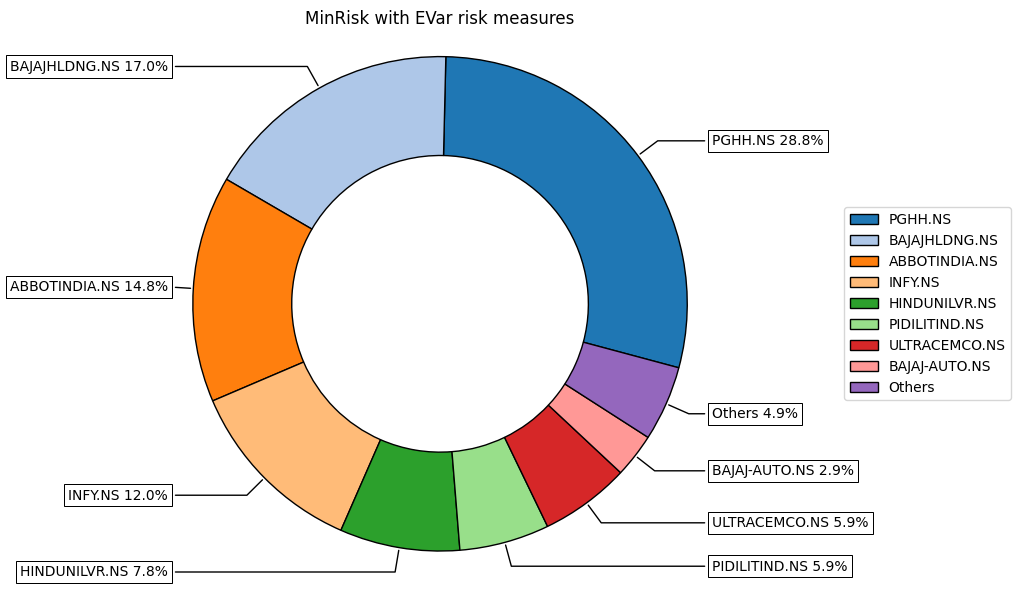

In [35]:
ax1 = rp.plot_pie(w=w4, title='MinRisk with EVar risk measures', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


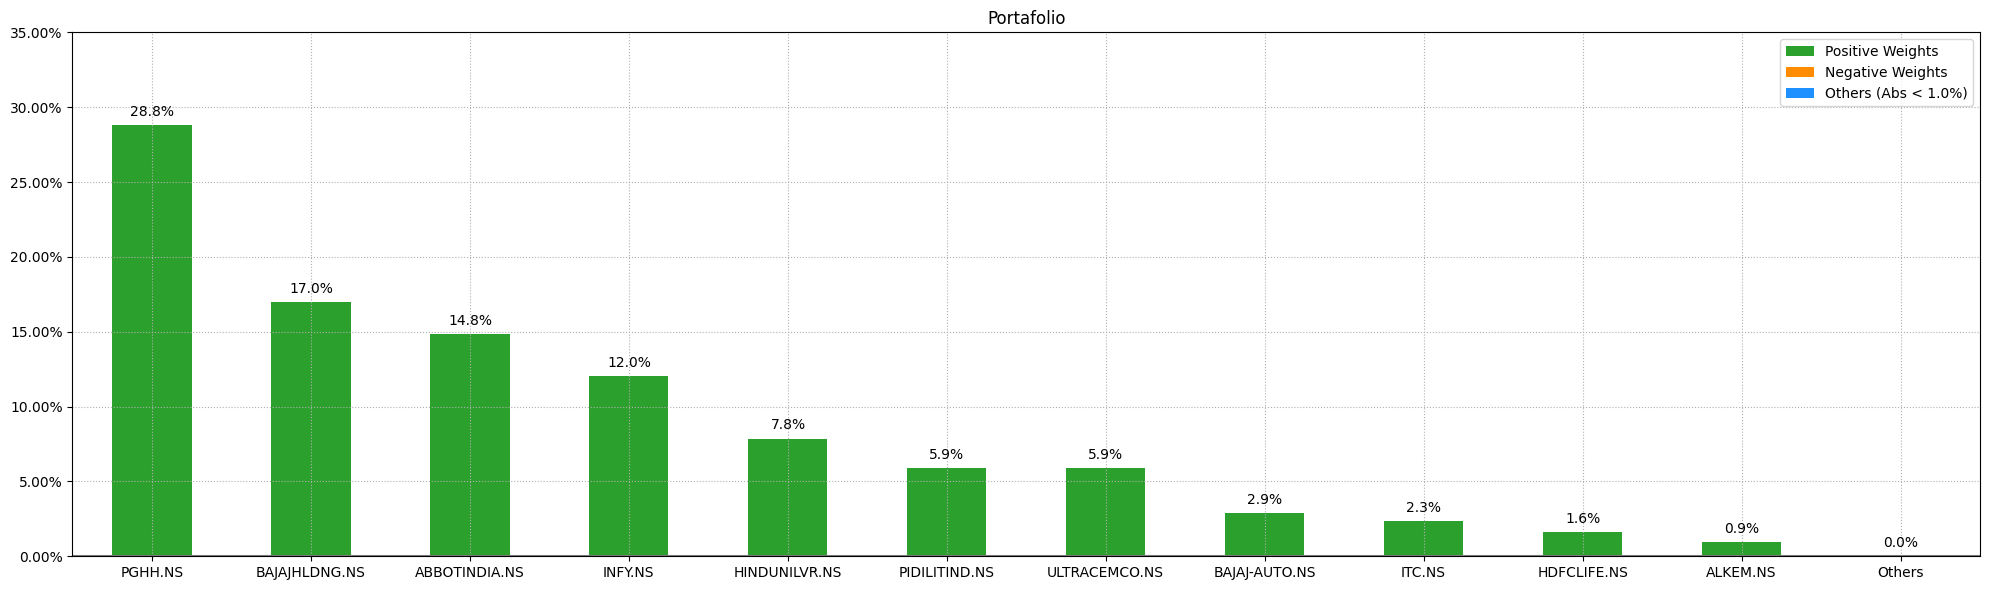

In [36]:
ax = rp.plot_bar(w4, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

# Risk Measure: EDaR

In [37]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EDaR' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w5 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w5.T)

C:\Users\Asud\AppData\Roaming\Python\Python310\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,0.000007,0.150675,0.000015,0.023234,0.120535,0.000002,0.000013,0.346498,0.000009,0.128681,...,0.160599,0.000001,0.000001,0.000002,0.000001,0.000001,0.000002,0.000003,0.04602,0.000002


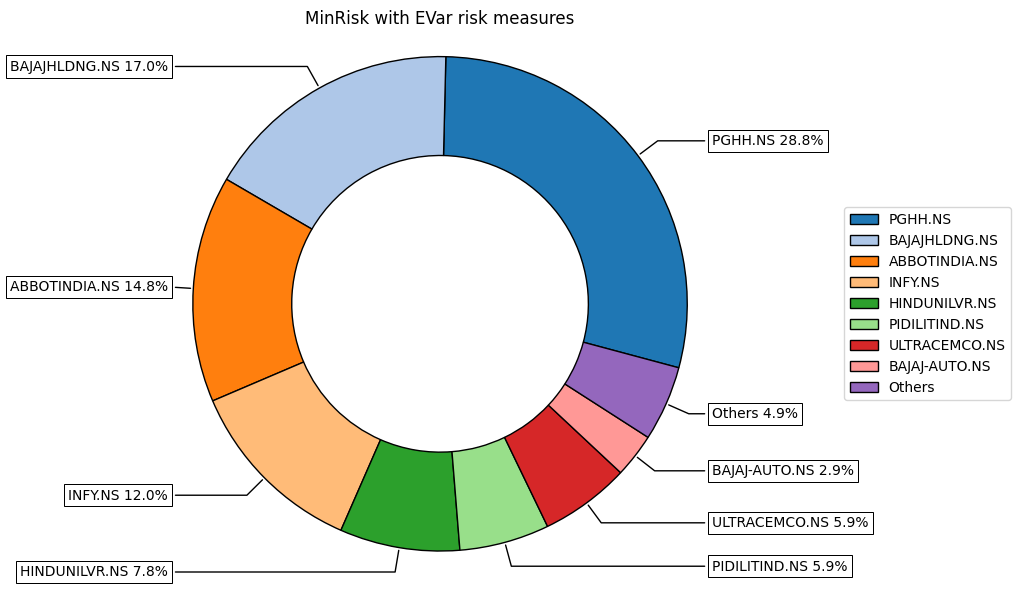

In [38]:
ax1 = rp.plot_pie(w=w4, title='MinRisk with EVar risk measures', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


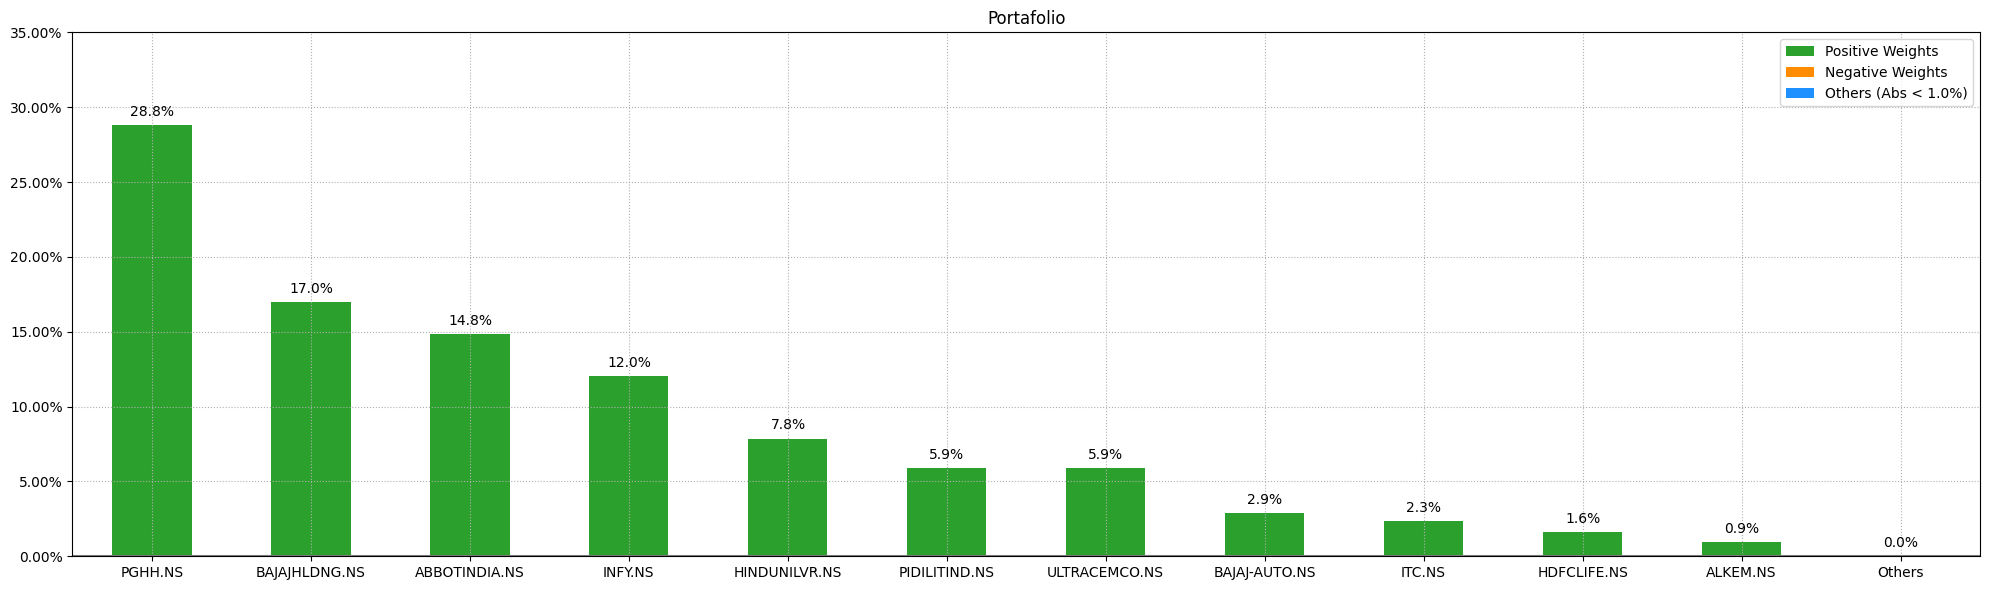

In [39]:
ax = rp.plot_bar(w4, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

# Risk Measure: MV

In [40]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w6 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w6.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,0.017978,0.161146,0.07234,0.097249,0.037914,0.018738,0.093987,0.141604,0.028873,0.064688,...,0.048738,1.169428e-08,1.723178e-07,3.644839e-09,5.661941e-09,1.735166e-08,0.04048,7.466293e-09,1.099353e-08,4.182462e-09


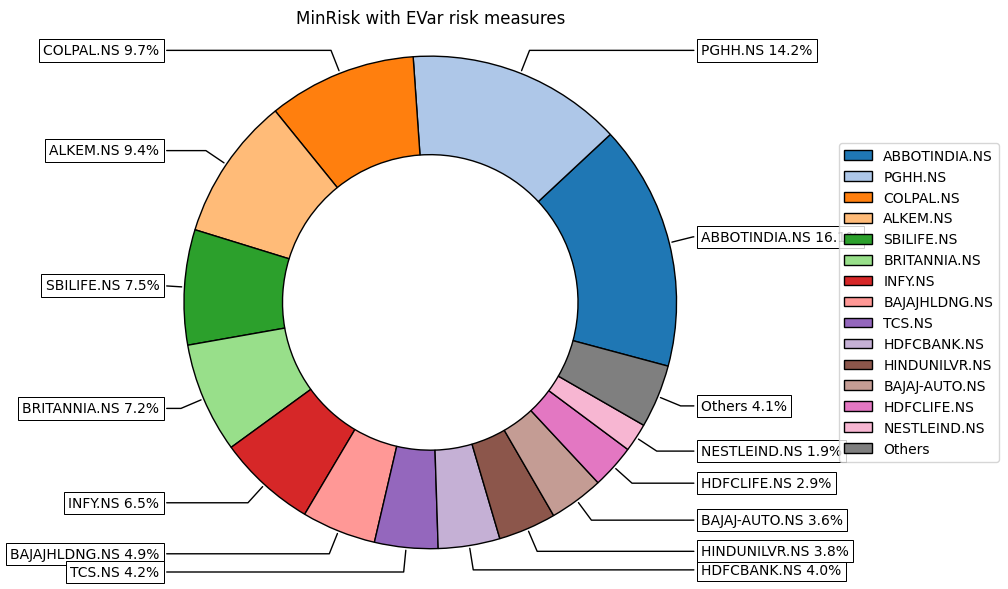

In [41]:
ax1 = rp.plot_pie(w=w6, title='MinRisk with EVar risk measures', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


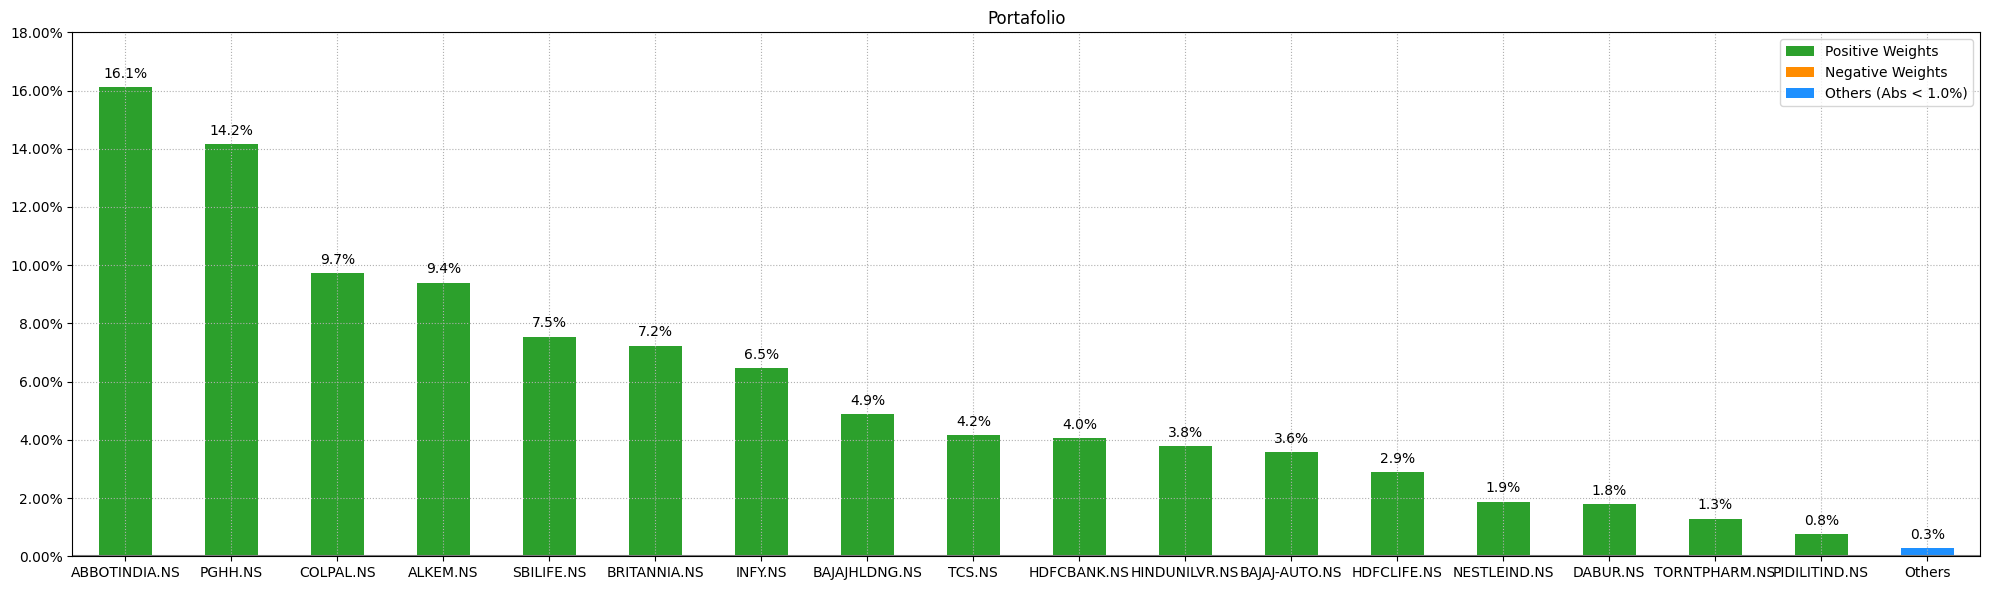

In [42]:
ax = rp.plot_bar(w6, title='Portafolio', kind="v", others=0.05, nrow=30, height=6, width=20, ax=None)

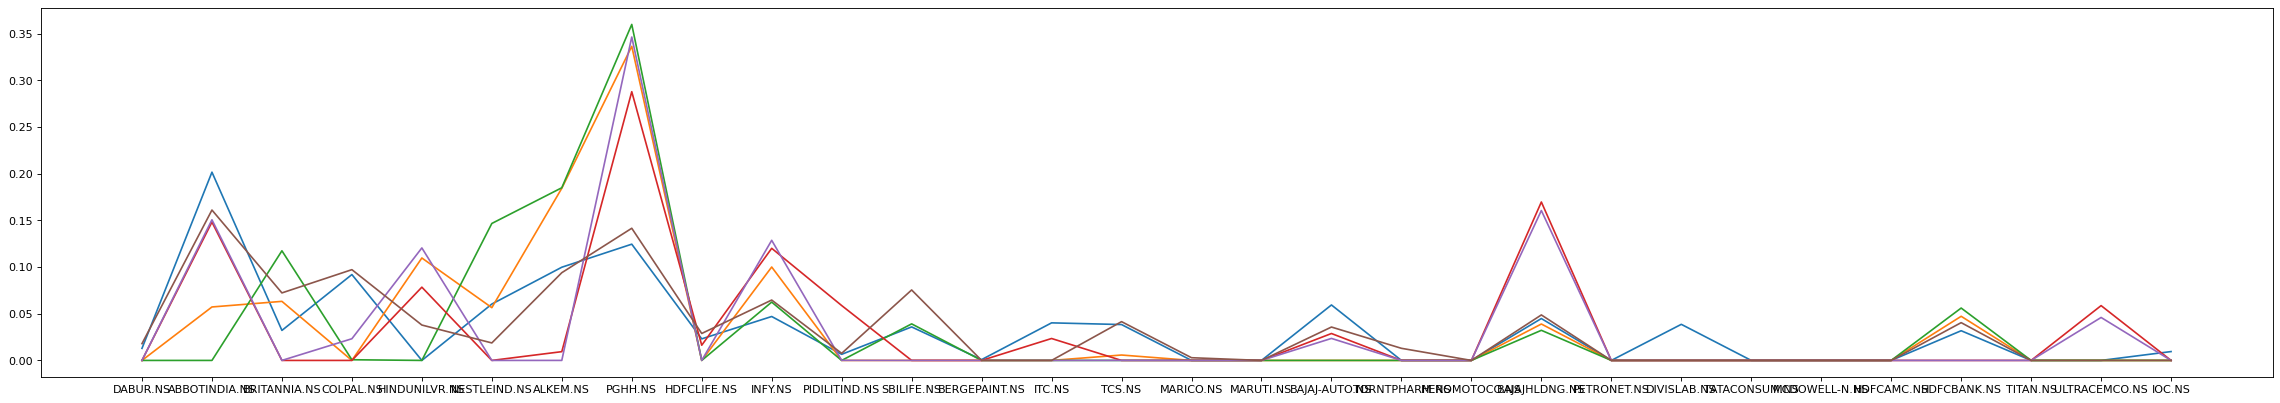

In [43]:
fig1 = plt.figure(figsize=(36, 6), dpi=80)
ax1 = fig1.add_subplot(111)
ax1.plot(w1)
ax1.plot(w2)
ax1.plot(w3)
ax1.plot(w4)
ax1.plot(w5)
ax1.plot(w6)
plt.show()

# Using Sharpe as an Objective with different Risk Measure

## Risk Measure: MAD

In [44]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MAD' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
W1 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(W1.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,1.602732e-12,0.015409,2.406067e-14,2.738949e-12,7.049730e-14,5.829395e-14,0.134335,0.163541,2.694876e-14,0.176544,...,0.12995,6.696455e-15,0.022809,7.222437e-14,1.432830e-14,1.375404e-14,8.817903e-14,0.035268,0.080436,2.690679e-14


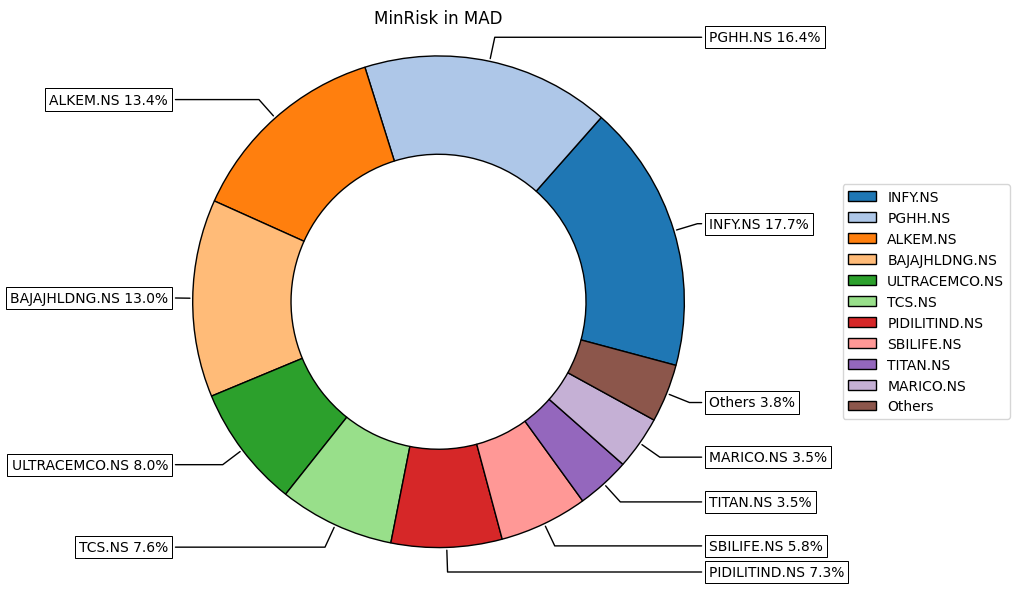

In [45]:
ax1 = rp.plot_pie(w=W1, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


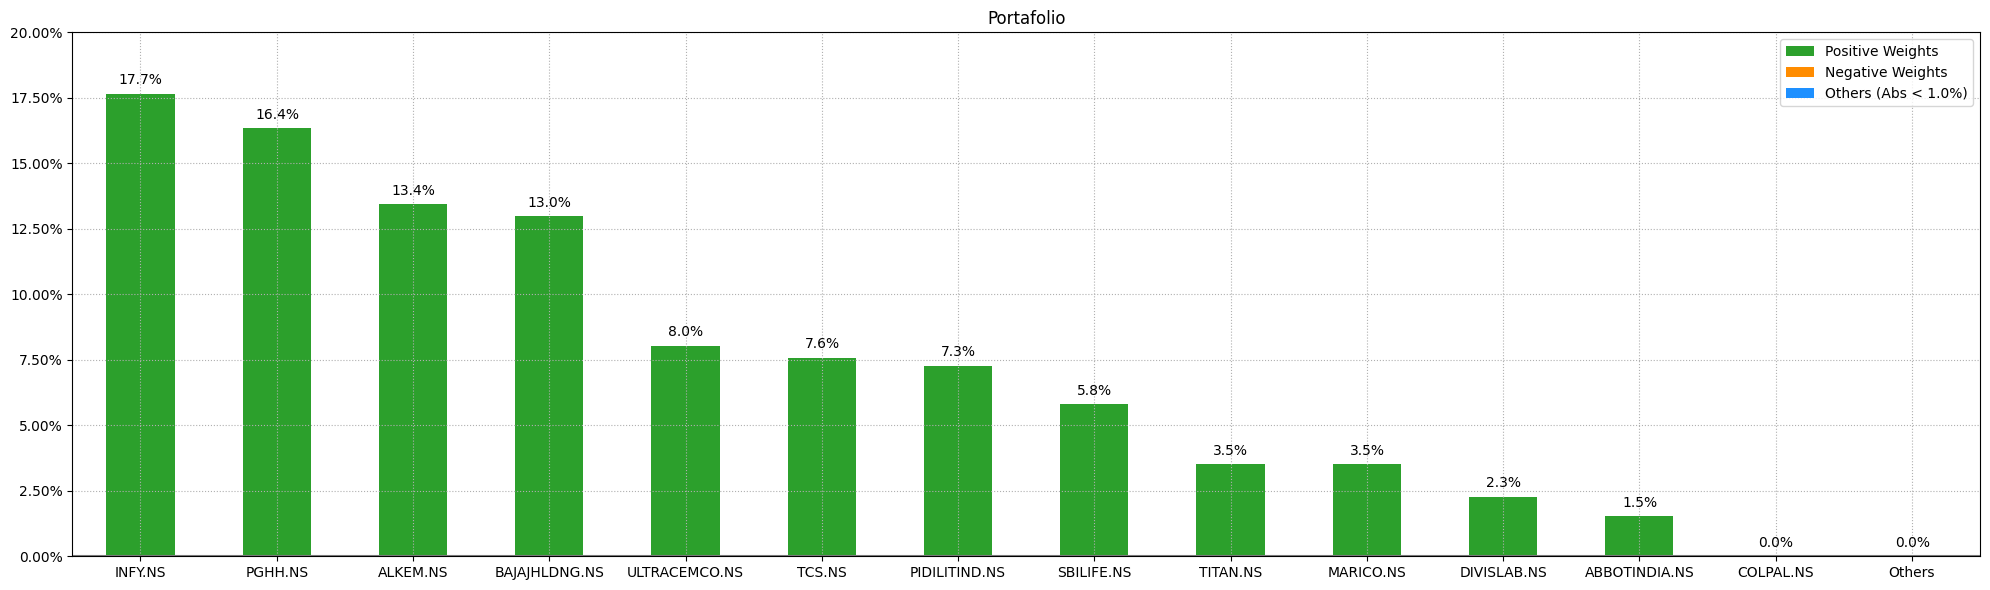

In [46]:
ax = rp.plot_bar(W1, title='Portafolio', kind="v", others=0.05, nrow=25, height=6, width=20, ax=None)

## Risk Measure: EVaR

In [47]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EVaR' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
W2 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(W2.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,5.613994e-10,1.291922e-09,5.405648e-10,4.367598e-10,0.075306,1.329308e-09,0.189204,0.336746,3.067752e-10,0.236709,...,0.059614,8.647022e-11,0.022933,4.114053e-10,1.073915e-10,1.295634e-10,3.011045e-10,2.949929e-10,0.079487,9.820805e-11


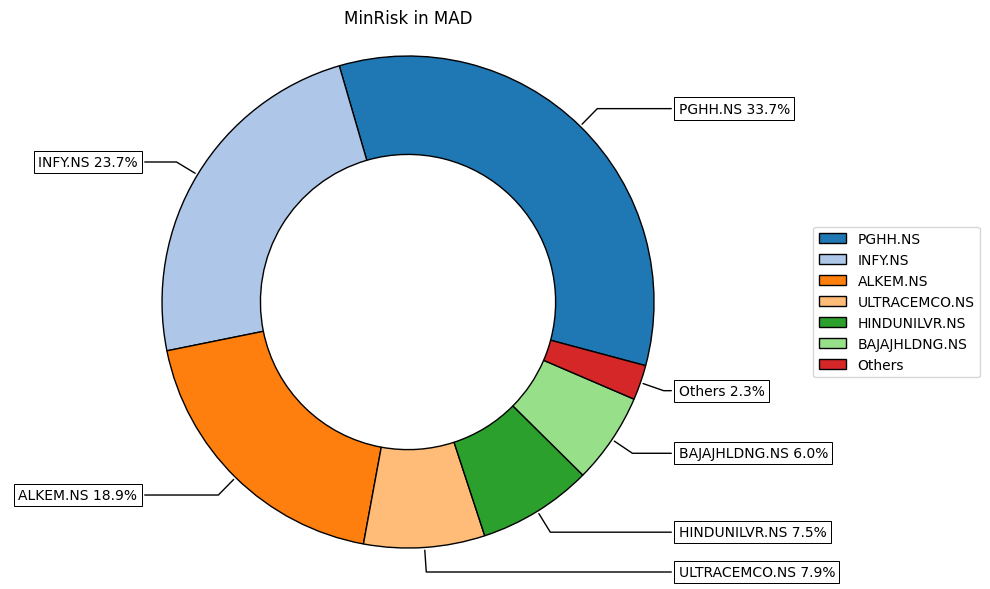

In [48]:
ax1 = rp.plot_pie(w=W2, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


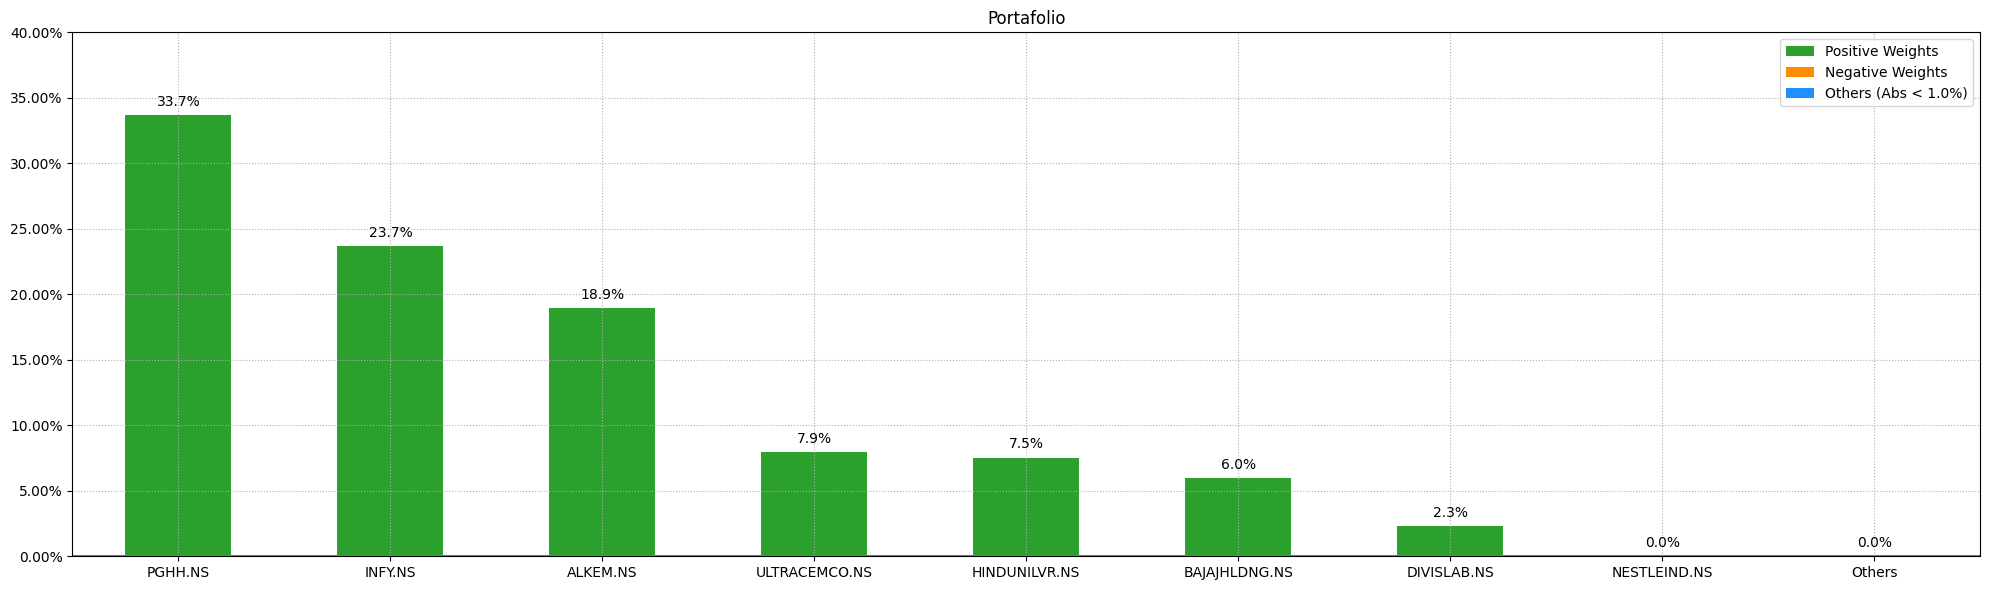

In [49]:
ax = rp.plot_bar(W2, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

## Risk Measure: CVaR

In [50]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CVaR' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
W3 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(W3.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,5.363928e-13,5.252551e-13,5.573257e-13,1.910075e-12,1.490432e-12,1.210160e-12,0.199699,0.307659,4.244537e-13,0.267923,...,0.108731,9.700516e-14,7.023857e-13,9.815294e-13,2.303085e-13,3.143451e-13,1.322958e-12,7.953313e-13,0.115988,1.941091e-13


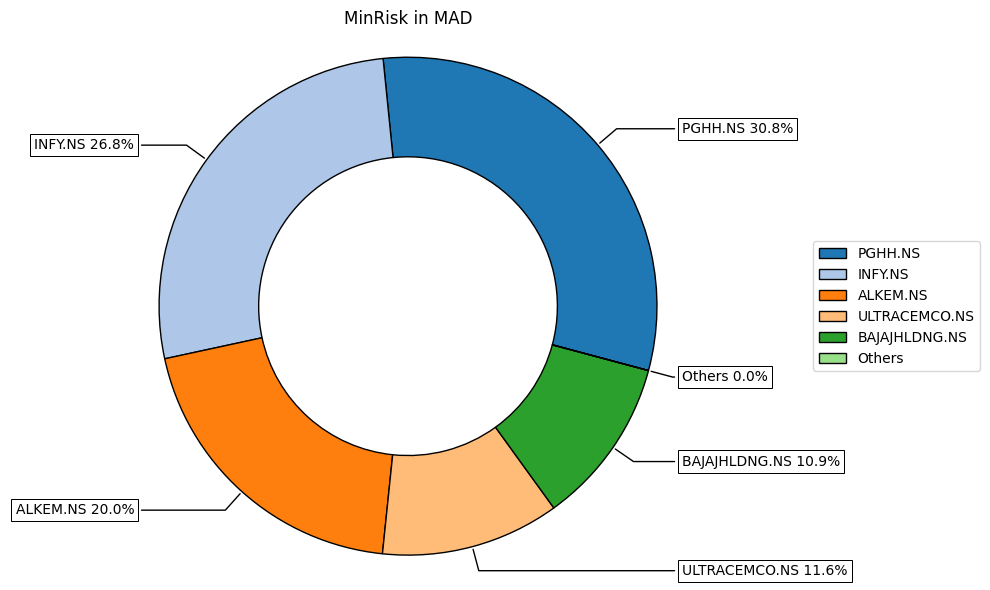

In [51]:
ax1 = rp.plot_pie(w=W3, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


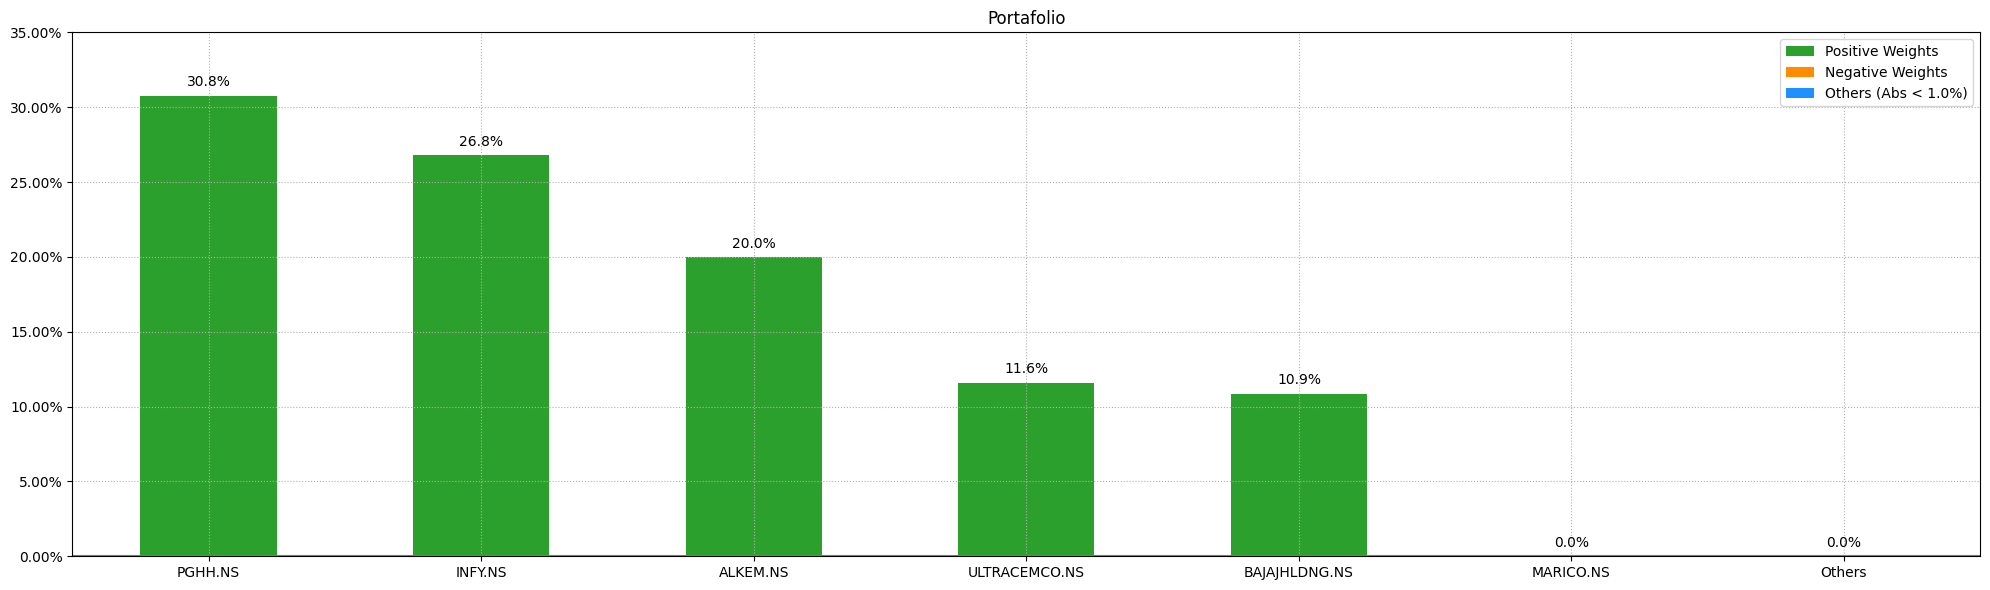

In [52]:
ax = rp.plot_bar(W3, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

# Risk Measure: CDaR

In [53]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CDaR' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
W4 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(W4.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,1.320410e-13,0.11407,2.075853e-13,4.307615e-14,5.318740e-13,1.582060e-14,0.031272,0.318021,5.711113e-14,0.133088,...,0.152479,1.066843e-16,6.126542e-14,9.878300e-13,1.111824e-14,1.515593e-14,9.763547e-14,1.043541e-12,0.106282,5.687145e-13


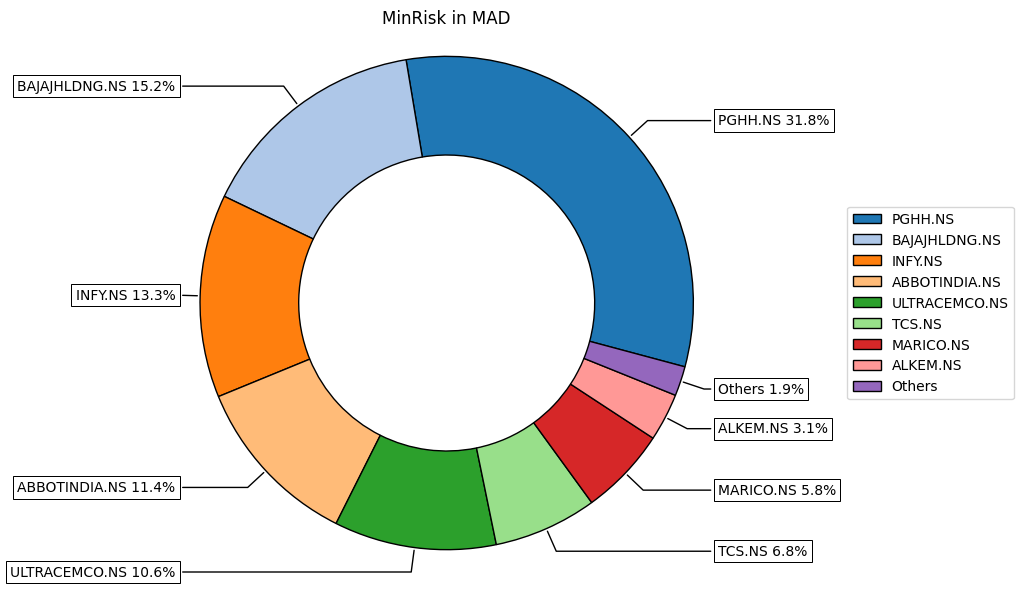

In [54]:
ax1 = rp.plot_pie(w=W4, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


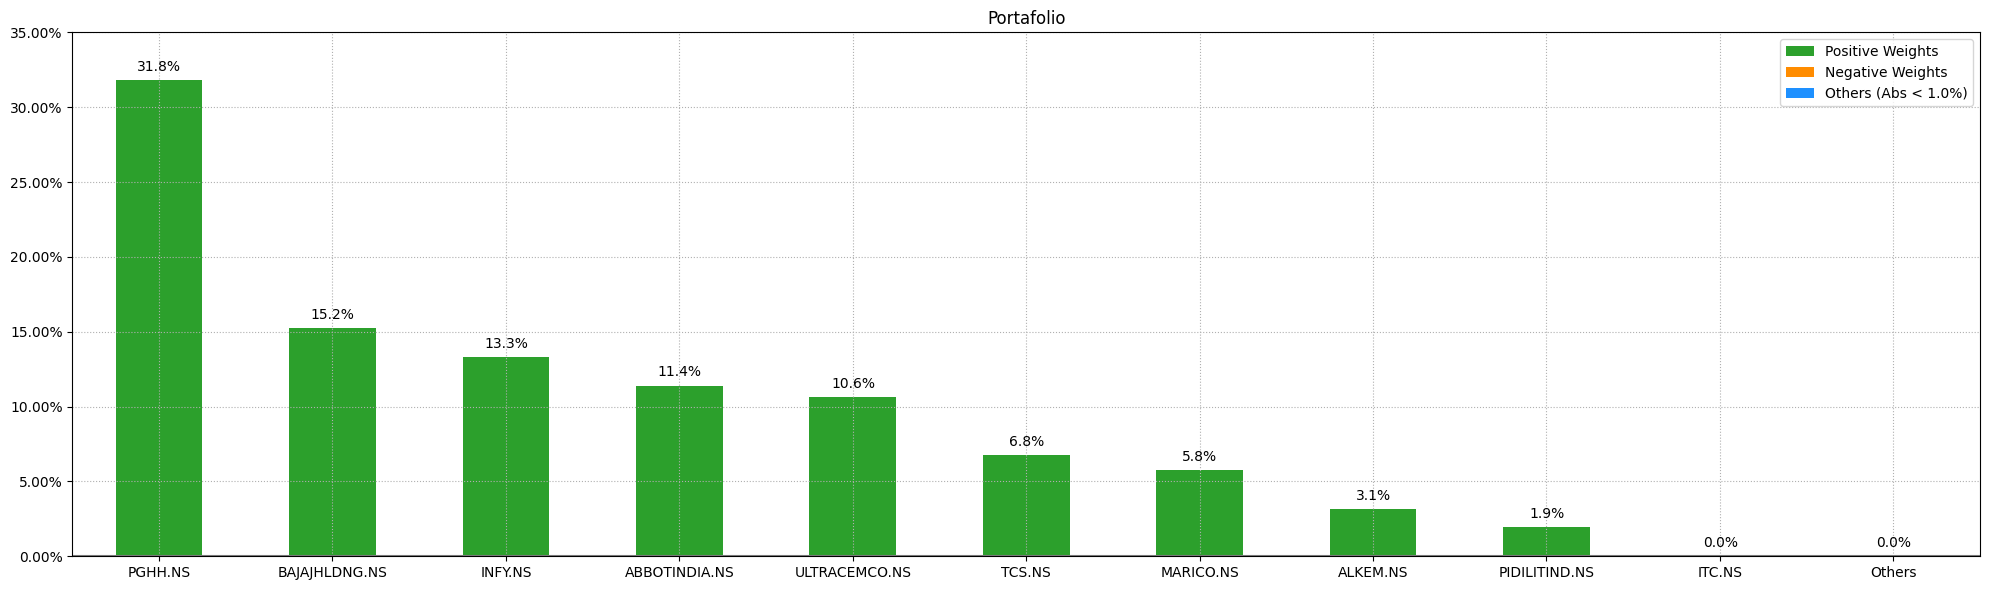

In [55]:
ax = rp.plot_bar(W4, title='Portafolio', kind="v", others=0.05,
                 nrow=30, height=6, width=20, ax=None)

## Risk Measure: EDaR

In [56]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EDaR' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
W5 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(W5.T)

,DABUR.NS,ABBOTINDIA.NS,BRITANNIA.NS,COLPAL.NS,HINDUNILVR.NS,NESTLEIND.NS,ALKEM.NS,PGHH.NS,HDFCLIFE.NS,INFY.NS,...,BAJAJHLDNG.NS,PETRONET.NS,DIVISLAB.NS,TATACONSUM.NS,MCDOWELL-N.NS,HDFCAMC.NS,HDFCBANK.NS,TITAN.NS,ULTRACEMCO.NS,IOC.NS
weights,1.558367e-10,0.022745,1.871335e-10,2.272593e-10,8.247338e-10,7.701502e-11,5.394779e-10,0.342112,1.458421e-10,0.186761,...,0.179127,5.971437e-11,8.783511e-11,1.672297e-10,6.623816e-11,5.513191e-11,1.667637e-10,6.135728e-10,0.160956,1.213878e-10


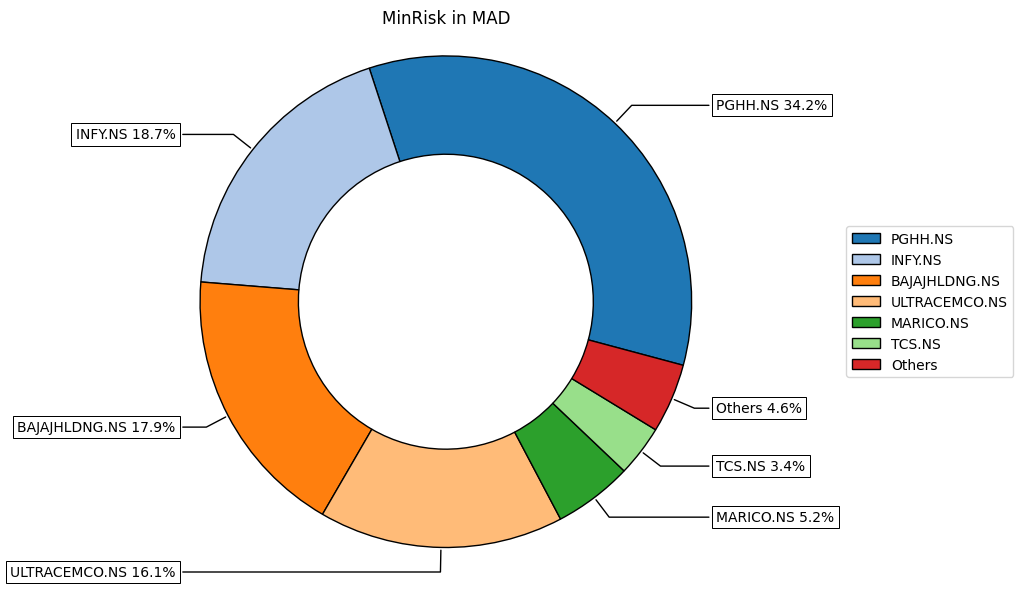

In [57]:
ax1 = rp.plot_pie(w=W5, title='MinRisk in MAD', cmap = "tab20", nrow = 30, height=6, width=10, ax=None)

c:\Users\Asud\AppData\Local\Programs\Python\Python310\lib\site-packages\riskfolio\src\PlotFunctions.py:875: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


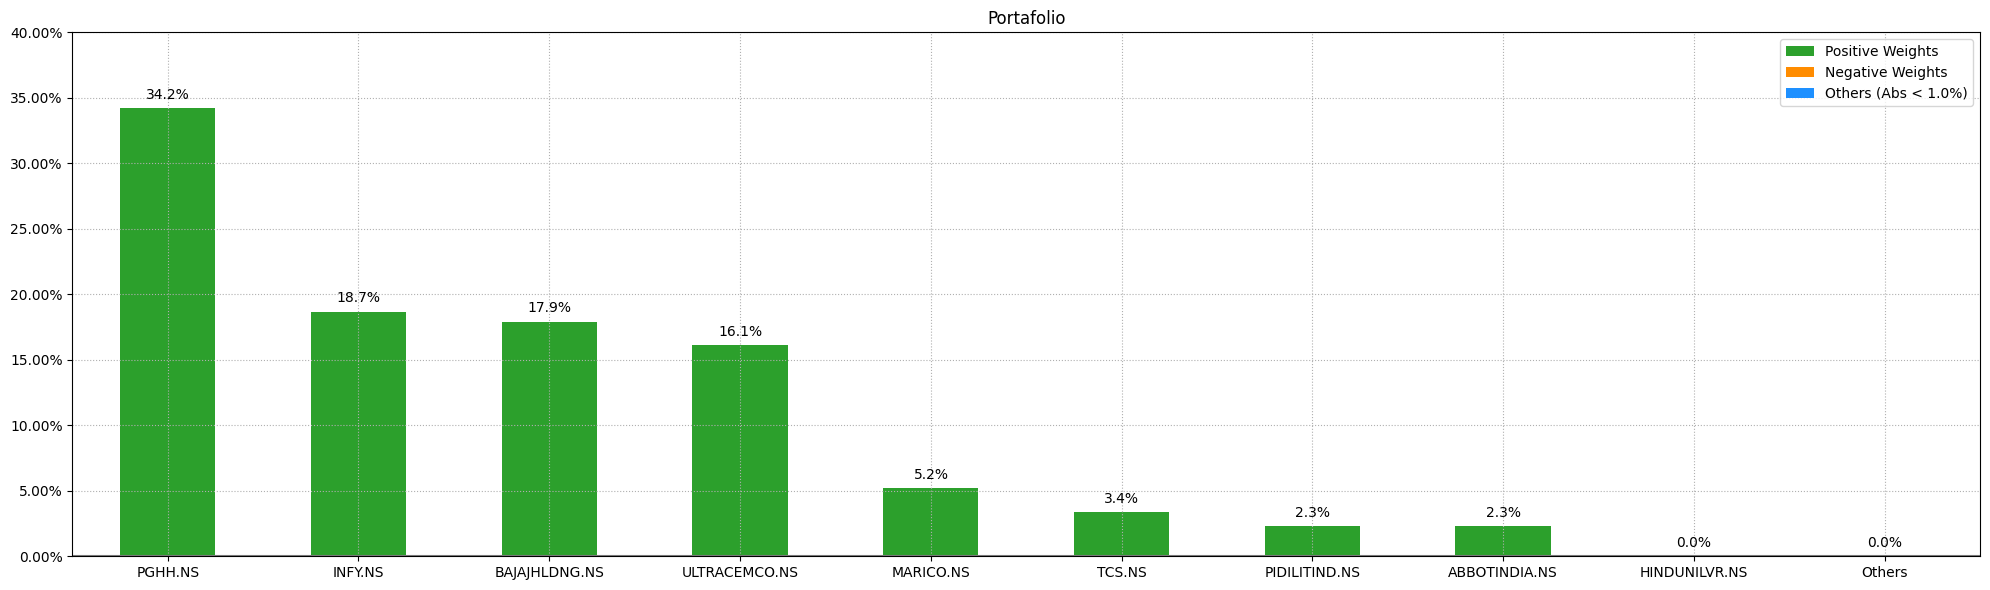

In [58]:
ax = rp.plot_bar(W5, title='Portafolio', kind="v", others=0.05, nrow=30, height=6, width=20, ax=None)

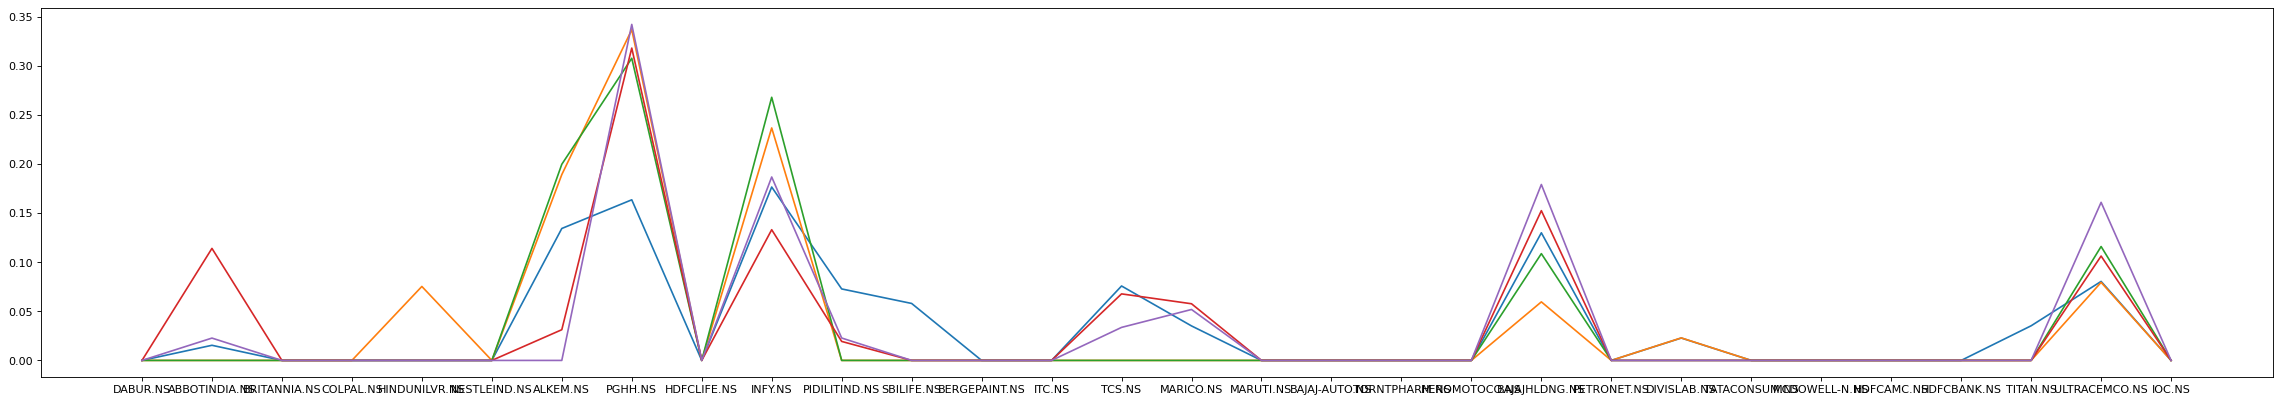

In [59]:
fig1 = plt.figure(figsize=(36, 6), dpi=80)
ax1 = fig1.add_subplot(111)
ax1.plot(W1)
ax1.plot(W2)
ax1.plot(W3)
ax1.plot(W4)
ax1.plot(W5)
plt.show()